In [66]:
import numpy as np

def J(X,y,w):
    yhat = X@w
    return np.sum((y-yhat)**2/2)

def Jgrad(X,y,w):
    """The gradient of J with respect to w"""
    yhat = (X@w)
    difference = (y-yhat).reshape(X.shape[0],1)
    return np.sum(difference*(X),axis=0)/X.shape[0]

def Jgrad2(X,y,w):
    """Same as the above with slicker notation (credit to Jian)."""
    yhat = (X@w)
    return (y-yhat)@X/X.shape[0]

    

def fit_adeline(X,y,max_epochs=50,eta=0.1):
    """Takes X and y and returns a trained w"""
    n,d = X.shape
    w = np.random.randn(d)
    errors = []
    W_history = []
    for epoch in range(max_epochs):
        W_history.append(w.copy())
        if epoch%(epoch//10+1) == 0:
            print(w,"error=",J(X,y,w))
        errors.append(J(X,y,w))
        dw = Jgrad(X,y,w)
        w += eta*dw
    return w,errors,W_history

def fit_adeline_simple(X,y,max_epochs=50,eta=0.1):
    """ I am including this minimalist version to show
        how remarkably simple Adeline is.
        The other implementation is fluffed up by recording
        w's and errors.
    """
    w = np.random.randn(X.shape[1])/10
    for epoch in range(max_epochs):
        w += eta*Jgrad(X,y,w)
    return w



In [67]:
## Some artificial data
N = 30
X = (np.random.rand(N).reshape(N//2,2) - 1/2)*10
## Adding a bias column
X = np.c_[np.ones(X.shape[0]),X]
X

array([[ 1.        , -3.38071759,  2.77279814],
       [ 1.        ,  2.61300929, -0.42540338],
       [ 1.        ,  2.32326985,  4.21634753],
       [ 1.        , -2.66652817,  3.14739992],
       [ 1.        ,  2.64165427,  3.71381074],
       [ 1.        , -0.78243451, -0.58698212],
       [ 1.        , -3.14402471, -3.00502456],
       [ 1.        , -4.86116465, -1.99834979],
       [ 1.        , -1.36905951, -4.62404068],
       [ 1.        , -0.43165991, -2.50799303],
       [ 1.        , -1.54173199,  2.01629121],
       [ 1.        ,  2.21573182, -3.74422965],
       [ 1.        ,  4.39815378,  3.37707719],
       [ 1.        ,  3.0082571 ,  2.57369681],
       [ 1.        ,  1.08953384,  3.07755078]])

In [68]:
### min-max scaling

mins = np.min(X,axis=0)[1:]
maxs = np.max(X,axis=0)[1:]
X[:,1:] = (X[:,1:]-mins)/(maxs-mins)
X

array([[1.        , 0.15988726, 0.83670973],
       [1.        , 0.80720563, 0.47493811],
       [1.        , 0.77591397, 1.        ],
       [1.        , 0.23701923, 0.87908364],
       [1.        , 0.81029926, 0.94315444],
       [1.        , 0.44050004, 0.45666078],
       [1.        , 0.18544993, 0.18313858],
       [1.        , 0.        , 0.29701081],
       [1.        , 0.37714494, 0.        ],
       [1.        , 0.47838345, 0.2393614 ],
       [1.        , 0.35849644, 0.75113578],
       [1.        , 0.76429993, 0.09952176],
       [1.        , 1.        , 0.90506409],
       [1.        , 0.84989212, 0.81418794],
       [1.        , 0.64267133, 0.8711825 ]])

In [69]:
import matplotlib.pyplot as plt

def plot_boundary(w,title="",X=np.empty([0,3]),y=[]):
    xaxis = np.linspace(-0.1,1.1,200)
    yaxis = np.linspace(-0.1,1.1,200)

    positive = [(a,b) for a in xaxis for b in yaxis if w.T@[1,a,b] >=0]
    negative = [(a,b) for a in xaxis for b in yaxis if w.T@[1,a,b] < 0]
    #assert(len(positive)>0)
    #assert(len(negative)>0)
    positive,negative = np.array(positive),np.array(negative)
    if len(positive)>0:
        plt.scatter(positive[:,0],positive[:,1],alpha=0.05)
    if len(negative)>0:
        plt.scatter(negative[:,0],negative[:,1],alpha=0.05)
    plt.title(title)
    if len(y)==0:
        plt.scatter(X[:,1],X[:,2],c="black")
    else:
        assert(set(y).issubset(set([-1,1])))
        Xpos,Xneg = X[y==1],X[y==-1]
        plt.scatter(Xpos[:,1],Xpos[:,2],c="black",marker="P")
        plt.scatter(Xneg[:,1],Xneg[:,2],c="black",marker="_")
    plt.show()



In [70]:
import numpy as np

phi = lambda z: z
phi = lambda z: (z >= 0)*2 -1


#np.random.seed(420)
#w = np.random.rand(3)/200
#0 = y0-mx0 + mx -y
x0,y0 = (0.5,0.5)
m = np.random.randn()
w = np.array([y0-m*x0,m,-1])
x = np.array([1,2,3])
w.T@x, phi(w.T@x)

(-4.174226955991202, -1)

In [71]:
yhat = phi(X@w)
yhat


array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1])

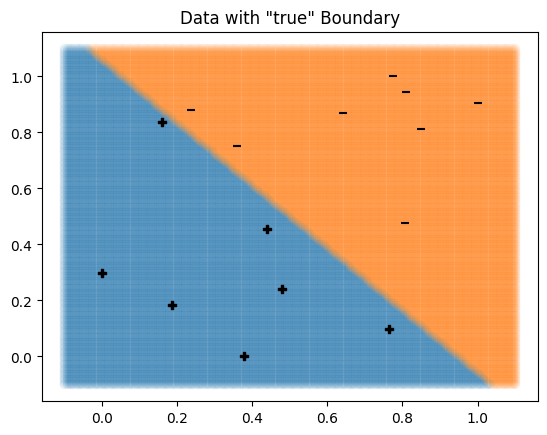

In [72]:
plot_boundary(w,X=X,y=yhat,title='Data with "true" Boundary')



In [73]:
y = phi(X@w)
w = np.random.randn(3)/10
y,w

(array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1]),
 array([-0.031892  , -0.36834326,  0.10341664]))

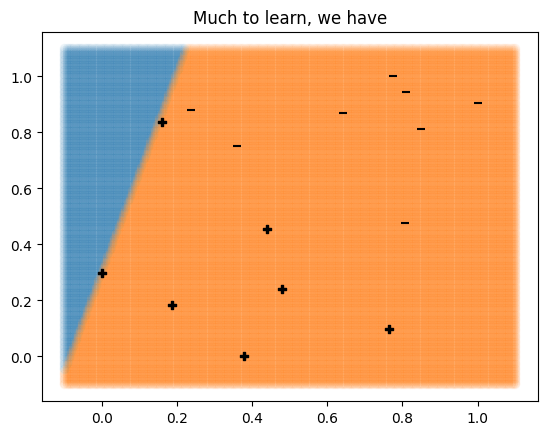

In [74]:
plot_boundary(w,X=X,y=y,title="Much to learn, we have")

In [75]:
w,errors,W_history= fit_adeline(X,y,max_epochs=5000,eta=0.1)
W_history = np.array(W_history)
w


[-1.92862641  1.08895887  0.99293641] error= 20.095280641835657
[-1.85761798  1.09649735  0.99317532] error= 19.372769077530254
[-1.79412071  1.10002062  0.98900352] error= 18.79321429201311
[-1.73691504  1.10021969  0.98119589] error= 18.31411516640375
[-1.6849849   1.09766998  0.97039749] error= 17.905966679559516
[-1.63748372  1.0928506   0.95714527] error= 17.548279824622544
[-1.5937061   1.08616045  0.94188616] error= 17.226820535609345
[-1.55306424  1.07793162  0.92499206] error= 16.93169426702123
[-1.51506826  1.06844058  0.90677244] error= 16.656017220849094
[-1.47930988  1.05791745  0.88748472] error= 16.394994543316074
[-1.44544875  1.04655374  0.86734302] error= 16.145280845184026
[-1.38233043  1.02191536  0.82517972] error= 15.671120266081434
[-1.32396307  0.99550526  0.78137545] error= 15.221980418900607
[-1.26912859  0.96800115  0.73668401] error= 14.792058632302675
[-1.21697809  0.93987117  0.69162405] error= 14.378328469426917
[-1.1425385   0.89718029  0.62408905] error

array([ 1.70923187, -1.18353476, -1.97731118])

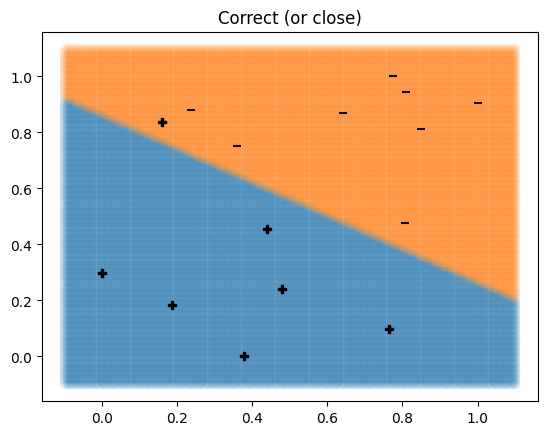

In [76]:
plot_boundary(w,X=X,y=y,title="Correct (or close)")

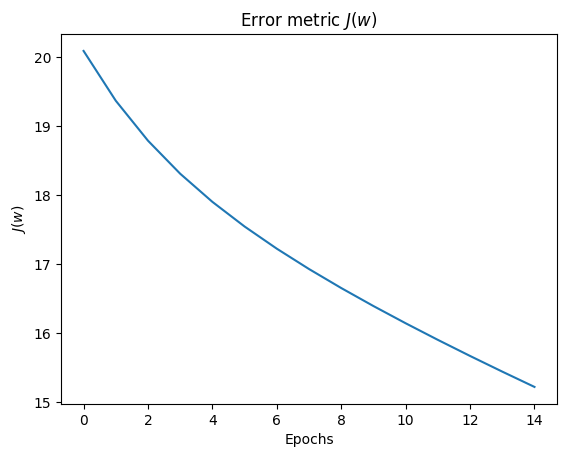

In [77]:
plt.plot(errors[:15])
plt.title(r"Error metric $J(w)$")
plt.xlabel("Epochs")
plt.ylabel(r"$J(w)$")
plt.show()

In [78]:
w

array([ 1.70923187, -1.18353476, -1.97731118])

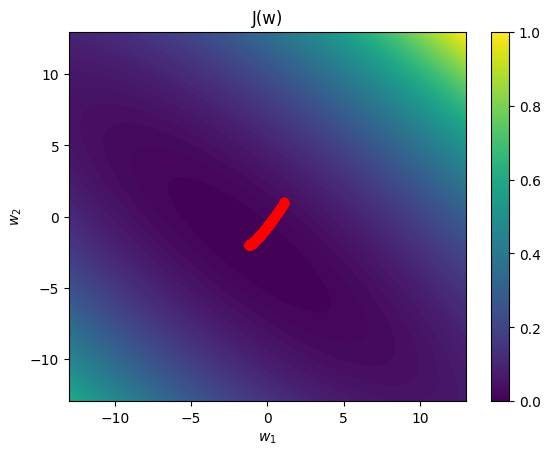

In [79]:
realaxis = np.linspace(-13,13,500)
w0 = w[0]
w1,w2 = np.meshgrid(realaxis,realaxis)
heat = J(X,y,np.array([w0,w1,w2],dtype="object"))
h = plt.contourf(w1,w2,heat,levels=100)
plt.scatter(W_history[:,1],W_history[:,2],c="red")
plt.xlabel(r"$w_1$")
plt.ylabel(r"$w_2$")
plt.title("J(w)")
plt.colorbar()
plt.show()

In [80]:
W_history[:10],W_history[-10:]

(array([[-1.92862641,  1.08895887,  0.99293641],
        [-1.85761798,  1.09649735,  0.99317532],
        [-1.79412071,  1.10002062,  0.98900352],
        [-1.73691504,  1.10021969,  0.98119589],
        [-1.6849849 ,  1.09766998,  0.97039749],
        [-1.63748372,  1.0928506 ,  0.95714527],
        [-1.5937061 ,  1.08616045,  0.94188616],
        [-1.55306424,  1.07793162,  0.92499206],
        [-1.51506826,  1.06844058,  0.90677244],
        [-1.47930988,  1.05791745,  0.88748472]]),
 array([[ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118],
        [ 1.70923187, -1.18353476, -1.97731118]]))

# Assignment Sketch

### The dataset

We will use the [amphibians](https://archive.ics.uci.edu/ml/datasets/Amphibians) dataset from the UCI ML Repo.

The data needs some preprocessing, such as the following.

1. Drop the ID column
2. Convert the Motorway column to an integer. Replace **A1** with 1 and **S52** with 0.
3. Select one of the frog or toad columns to be the target and copy it into `y` (for example "tree frog"). Replace 0 with -1 so that the classes are $\pm 1$.
4. Copy all the columns that are not frog or toad columns into `X`.
5. Scale the data `X` using Z-score scaling or min-max scaling (your choice).
6. Add a bias column to `X`.

Now you have `X` and `y` and you are ready to do some ML using Adeline.

First try the implementation of Adeline from class on the data and see what kind of accuracy you can get (try tuning $\eta$ a bit and plotting the error curves).

Then it is time for you to write some code...

### Specifications

In class we implemented "vanilla" Adeline.  We used batch gradient descent.

Using this code as a base, implement

1. Adeline using stochastic gradient descent
2. Adeline using mini-batch gradient descent with batches of size 32. 

You can do this by implementing a `fit_adeline_sgd` function (that obviously uses SGD to find `w`) and a `fit_adeline_mbsgd` function that uses mini-batch SGD.  For the latter add `batch_size` as a parameter and give it a default value of 32.

For each approach, plot something like the figure above titled "**Error metric $J(w)$**".

When that works add another twist: shuffling `X` and `y` between epochs.  Note that you need to give `X` and `y` the same shuffle so that the rows correspond after shuffling. 

Does that speed up convergence?

What about trying three different versions of $\eta$?

Try $\eta=0.1$, $\eta=0.01$ and $\eta=0.001$.

Try plotting the error curves for the three versions of $\eta$ all in the same plot.

If you have time see if you can improve SGD performance by using an adaptive learning rate that deceases over time (as described in the book).

If $t$ is the number of iterations, the formula for an adaptive learning rate is

$$\eta(t) = \frac{c_1}{t+c_2}$$

where $c_1$ and $c_2$ are constants that you determine experimentally.  I have no idea what they should be.  Perhaps try $c_1 = c_2 = 1$ as a first guess.

Tuning constants like $c_1$ and $c_2$ is an example of "fitting hyperparameters".  A "hyperparameter" is a parameter of an ML model that is not "fit" during the learning process. The weight vector `w` is a regular parameter because it gets trained automatically.  But for hyperparameters like $c_1$ and $c_2$ you often need to experimentally grope around a bit.


